## Load in packages and data

In [3]:
import numpy as np
import pandas as pd
# import geopandas as gpd
import matplotlib.pyplot as plt
import matsim_output_analysis as moa
import operator

In [53]:
# df = pd.read_csv(r"20000_sample.csv") #using look3, ignoring some fields such as carCO2
# df = pd.read_csv(r"2040baselineoutputs_231025.csv")
df = pd.read_csv(r"NTI_10000_sample_routes.csv")
# df_spare = df #for resetting if needed

In [54]:
df = df[~df["subpopulation"].isin(["hgv","lgv","airport", "lgv_ev"])] #choose only the actual people

In [55]:
#turn plan summaries into lists instead of long strings
df['selected plan activity_type_or_mode'] = df['selected plan activity_type_or_mode'].str.split('; ')
df['selected plan distance_travelled'] = df['selected plan distance_travelled'].str.split('; ')
df['selected plan duration'] = df['selected plan duration'].str.split('; ')
df['selected plan location'] = df['selected plan location'].str.split('; ')
df['selected plan routes'] = df['selected plan routes'].str.split('; ')

df['unselected plan (1) activity_type_or_mode'] = df['unselected plan (1) activity_type_or_mode'].str.split('; ')
df['unselected plan (1) distance_travelled'] = df['unselected plan (1) distance_travelled'].str.split('; ')
df['unselected plan (1) duration'] = df['unselected plan (1) duration'].str.split('; ')
df['unselected plan (1) location'] = df['unselected plan (1) location'].str.split('; ')
df['unselected plan (1) routes'] = df['unselected plan (1) routes'].str.split('; ')

df['unselected plan (2) activity_type_or_mode'] = df['unselected plan (2) activity_type_or_mode'].str.split('; ')
df['unselected plan (2) distance_travelled'] = df['unselected plan (2) distance_travelled'].str.split('; ')
df['unselected plan (2) duration'] = df['unselected plan (2) duration'].str.split('; ')
df['unselected plan (2) location'] = df['unselected plan (2) location'].str.split('; ')
df['unselected plan (2) routes'] = df['unselected plan (2) routes'].str.split('; ')

df['unselected plan (3) activity_type_or_mode'] = df['unselected plan (3) activity_type_or_mode'].str.split('; ')
df['unselected plan (3) distance_travelled'] = df['unselected plan (3) distance_travelled'].str.split('; ')
df['unselected plan (3) duration'] = df['unselected plan (3) duration'].str.split('; ')
df['unselected plan (3) location'] = df['unselected plan (3) location'].str.split('; ')
df['unselected plan (3) routes'] = df['unselected plan (3) routes'].str.split('; ')

df['unselected plan (4) activity_type_or_mode'] = df['unselected plan (4) activity_type_or_mode'].str.split('; ')
df['unselected plan (4) distance_travelled'] = df['unselected plan (4) distance_travelled'].str.split('; ')
df['unselected plan (4) duration'] = df['unselected plan (4) duration'].str.split('; ')
df['unselected plan (4) location'] = df['unselected plan (4) location'].str.split('; ')
df['unselected plan (4) routes'] = df['unselected plan (4) routes'].str.split('; ')

## Remove "pt interaction" terms and all corresponding columns

In [56]:
#extract the indices of where pt interaction happens
df['selected plan ptinteraction_indices'] = df['selected plan activity_type_or_mode'].apply(moa.get_ptinteraction_index)
df['unselected plan (1) ptinteraction_indices'] = df['unselected plan (1) activity_type_or_mode'].apply(moa.get_ptinteraction_index)
df['unselected plan (2) ptinteraction_indices'] = df['unselected plan (2) activity_type_or_mode'].apply(moa.get_ptinteraction_index)
df['unselected plan (3) ptinteraction_indices'] = df['unselected plan (3) activity_type_or_mode'].apply(moa.get_ptinteraction_index)
df['unselected plan (4) ptinteraction_indices'] = df['unselected plan (4) activity_type_or_mode'].apply(moa.get_ptinteraction_index)

In [57]:
#remove the pt interaction activities
df['selected plan activity_type_or_mode'] = df.apply(lambda row: moa.remove_ptinteraction(row['selected plan ptinteraction_indices'], row['selected plan activity_type_or_mode']), axis=1)
df['unselected plan (1) activity_type_or_mode'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (1) ptinteraction_indices'], row['unselected plan (1) activity_type_or_mode']), axis=1)
df['unselected plan (2) activity_type_or_mode'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (2) ptinteraction_indices'], row['unselected plan (2) activity_type_or_mode']), axis=1)
df['unselected plan (3) activity_type_or_mode'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (3) ptinteraction_indices'], row['unselected plan (3) activity_type_or_mode']), axis=1)
df['unselected plan (4) activity_type_or_mode'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (4) ptinteraction_indices'], row['unselected plan (4) activity_type_or_mode']), axis=1)

In [58]:
#remove the correspinding pt interaction durations
df['selected plan duration'] = df.apply(lambda row: moa.remove_ptinteraction(row['selected plan ptinteraction_indices'], row['selected plan duration']), axis=1)
df['unselected plan (1) duration'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (1) ptinteraction_indices'], row['unselected plan (1) duration']), axis=1)
df['unselected plan (2) duration'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (2) ptinteraction_indices'], row['unselected plan (2) duration']), axis=1)
df['unselected plan (3) duration'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (3) ptinteraction_indices'], row['unselected plan (3) duration']), axis=1)
df['unselected plan (4) duration'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (4) ptinteraction_indices'], row['unselected plan (4) duration']), axis=1)

In [59]:
#remove the correspinding pt interaction locations
df['selected plan location'] = df.apply(lambda row: moa.remove_ptinteraction(row['selected plan ptinteraction_indices'], row['selected plan location']), axis=1)
df['unselected plan (1) location'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (1) ptinteraction_indices'], row['unselected plan (1) location']), axis=1)
df['unselected plan (2) location'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (2) ptinteraction_indices'], row['unselected plan (2) location']), axis=1)
df['unselected plan (3) location'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (3) ptinteraction_indices'], row['unselected plan (3) location']), axis=1)
df['unselected plan (4) location'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (4) ptinteraction_indices'], row['unselected plan (4) location']), axis=1)

In [60]:
#remove the correspinding pt interaction distance travelled
df['selected plan distance_travelled'] = df.apply(lambda row: moa.remove_ptinteraction(row['selected plan ptinteraction_indices'], row['selected plan distance_travelled']), axis=1)
df['unselected plan (1) distance_travelled'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (1) ptinteraction_indices'], row['unselected plan (1) distance_travelled']), axis=1)
df['unselected plan (2) distance_travelled'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (2) ptinteraction_indices'], row['unselected plan (2) distance_travelled']), axis=1)
df['unselected plan (3) distance_travelled'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (3) ptinteraction_indices'], row['unselected plan (3) distance_travelled']), axis=1)
df['unselected plan (4) distance_travelled'] = df.apply(lambda row: moa.remove_ptinteraction(row['unselected plan (4) ptinteraction_indices'], row['unselected plan (4) distance_travelled']), axis=1)

In [61]:
#clean  up table and remove indices
df = df.drop(["selected plan ptinteraction_indices","unselected plan (1) ptinteraction_indices","unselected plan (2) ptinteraction_indices","unselected plan (3) ptinteraction_indices","unselected plan (4) ptinteraction_indices"], axis=1)

## Extract the modes and the leg durations

In [62]:
#selected plan
#get activity indices
df["sp_activities_indices"] = df["selected plan activity_type_or_mode"].apply(moa.get_activities_indices_only)
#get stuck index out
df[["sp_activity_starts", "sp_activity_ends","sp_stuck_index"]] = df.apply(lambda row: moa.get_activity_timings(row["sp_activities_indices"], row["selected plan duration"], row["selected plan activity_type_or_mode"]), axis=1, result_type="expand")
#group times into trips
df["sp_trips_groups"] = df.apply(lambda row: moa.group_legs_into_trips(row["selected plan activity_type_or_mode"], row["sp_activities_indices"], row["sp_stuck_index"]), axis=1)
#group modes into trips
df["sp_trips_groups_duration"] = df.apply(lambda row: moa.group_legs_into_trips_d(row["selected plan duration"], row["sp_activities_indices"], row["sp_stuck_index"], "duration"), axis=1)

In [63]:
df = df.drop(["sp_activities_indices", "sp_activity_starts", "sp_activity_ends","sp_stuck_index"], axis=1)

In [64]:
#unselected plan 1
#get activity indices
df["up1_activities_indices"] = df["unselected plan (1) activity_type_or_mode"].apply(moa.get_activities_indices_only)
#get stuck index out
df[["up1_activity_starts", "up1_activity_ends","up1_stuck_index"]] = df.apply(lambda row: moa.get_activity_timings(row["up1_activities_indices"], row["unselected plan (1) duration"], row["unselected plan (1) activity_type_or_mode"]), axis=1, result_type="expand")
#group times into trips
df["up1_trips_groups"] = df.apply(lambda row: moa.group_legs_into_trips(row["unselected plan (1) activity_type_or_mode"], row["up1_activities_indices"], row["up1_stuck_index"]), axis=1)
#group modes into trips
df["up1_trips_groups_duration"] = df.apply(lambda row: moa.group_legs_into_trips_d(row["unselected plan (1) duration"], row["up1_activities_indices"], row["up1_stuck_index"], "duration"), axis=1)

In [65]:
df = df.drop(["up1_activities_indices", "up1_activity_starts", "up1_activity_ends","up1_stuck_index"], axis=1)

In [66]:
#unselected plan 2
#get activity indices
df["up2_activities_indices"] = df["unselected plan (2) activity_type_or_mode"].apply(moa.get_activities_indices_only)
#get stuck index out
df[["up2_activity_starts", "up2_activity_ends","up2_stuck_index"]] = df.apply(lambda row: moa.get_activity_timings(row["up2_activities_indices"], row["unselected plan (2) duration"], row["unselected plan (2) activity_type_or_mode"]), axis=1, result_type="expand")
#group times into trips
df["up2_trips_groups"] = df.apply(lambda row: moa.group_legs_into_trips(row["unselected plan (2) activity_type_or_mode"], row["up2_activities_indices"], row["up2_stuck_index"]), axis=1)
#group modes into trips
df["up2_trips_groups_duration"] = df.apply(lambda row: moa.group_legs_into_trips_d(row["unselected plan (2) duration"], row["up2_activities_indices"], row["up2_stuck_index"], "duration"), axis=1)

In [67]:
df = df.drop(["up2_activities_indices", "up2_activity_starts", "up2_activity_ends","up2_stuck_index"], axis=1)

In [68]:
#unselected plan 3
#get activity indices
df["up3_activities_indices"] = df["unselected plan (3) activity_type_or_mode"].apply(moa.get_activities_indices_only)
#get stuck index out
df[["up3_activity_starts", "up3_activity_ends","up3_stuck_index"]] = df.apply(lambda row: moa.get_activity_timings(row["up3_activities_indices"], row["unselected plan (3) duration"], row["unselected plan (3) activity_type_or_mode"]), axis=1, result_type="expand")
#group times into trips
df["up3_trips_groups"] = df.apply(lambda row: moa.group_legs_into_trips(row["unselected plan (3) activity_type_or_mode"], row["up3_activities_indices"], row["up3_stuck_index"]), axis=1)
#group modes into trips
df["up3_trips_groups_duration"] = df.apply(lambda row: moa.group_legs_into_trips_d(row["unselected plan (3) duration"], row["up3_activities_indices"], row["up3_stuck_index"], "duration"), axis=1)

In [69]:
df = df.drop(["up3_activities_indices", "up3_activity_starts", "up3_activity_ends","up3_stuck_index"], axis=1)

In [70]:
#unselected plan 4
#get activity indices
df["up4_activities_indices"] = df["unselected plan (4) activity_type_or_mode"].apply(moa.get_activities_indices_only)
#get stuck index out
df[["up4_activity_starts", "up4_activity_ends","up4_stuck_index"]] = df.apply(lambda row: moa.get_activity_timings(row["up4_activities_indices"], row["unselected plan (4) duration"], row["unselected plan (4) activity_type_or_mode"]), axis=1, result_type="expand")
#group times into trips
df["up4_trips_groups"] = df.apply(lambda row: moa.group_legs_into_trips(row["unselected plan (4) activity_type_or_mode"], row["up4_activities_indices"], row["up4_stuck_index"]), axis=1)
#group modes into trips
df["up4_trips_groups_duration"] = df.apply(lambda row: moa.group_legs_into_trips_d(row["unselected plan (4) duration"], row["up4_activities_indices"], row["up4_stuck_index"], "duration"), axis=1)

In [71]:
df = df.drop(["up4_activities_indices", "up4_activity_starts", "up4_activity_ends","up4_stuck_index"], axis=1)

In [72]:
len(max(df.sp_trips_groups, key=len))

15

In [113]:
df["trips_modes"] = df[["sp_trips_groups", "up1_trips_groups", "up2_trips_groups", "up3_trips_groups","up4_trips_groups"]].apply(lambda row: list(row), axis=1)
df["trips_durations"] = df[["sp_trips_groups_duration", "up1_trips_groups_duration", "up2_trips_groups_duration", "up3_trips_groups_duration","up4_trips_groups_duration"]].apply(lambda row: list(row), axis=1)
df["all_utilities"] = df[["selected plan utility", "unselected plan (1) utility", "unselected plan (2) utility", "unselected plan (3) utility","unselected plan (4) utility"]].apply(lambda row: list(row), axis=1)

In [114]:
# df.trips_durations[0]

### Start by just looking at the first trip before figuring out how to do dynamic across all trips (need it so that more trips doesnt necessarily mean more flexibility)

Using selected plan as the anchor

In [ ]:
#turn the first modes and first durations, and overall utilities into their own columns
df["first_trip_modes"] = df["trips_modes"].apply(lambda x: [inner[0] if isinstance(inner, list) and inner else None for inner in x] if isinstance(x, list) else None)
df["first_trip_durations"] = df["trips_durations"].apply(lambda x: [inner[0] if isinstance(inner, list) and inner else None for inner in x] if isinstance(x, list) else None)
#check the subsequent modes against the first one and keep only the highest-scoring unique ones
#calculate delta u_trip and delta u_total
#wang it all together

In [138]:
#so this function just looks at the highest scoring unique modes, agnostic of which the selected plan is
#but i think we need something to be an anchor since this whole thing is relative and comparative
def trips_to_keep(modes, durations, utilities):
    if not modes:
        return [], [], []
    if not (len(modes) == len(durations) == len(utilities)):
        raise ValueError("All three lists must have the same length")
    modes_fixed = [tuple(m) if isinstance(m, list) else m for m in modes]
    first_key = modes_fixed[0]
    # best per key -> (value, index)
    best = {}

    # scan items after index 0
    for idx in range(1, len(modes_fixed)):
        k = modes_fixed[idx]
        if k == first_key:
            continue
        v = durations[idx]
        if k not in best or v > best[k][0] or (v == best[k][0] and idx < best[k][1]):
            best[k] = (v, idx)

    # preserve order by the chosen item index (stable order)
    chosen_indices = [best[k][1] for k in sorted(best, key=lambda kk: best[kk][1])]

    # build output lists: prepend index 0
    out_keys   = [modes_fixed[0]] +  [modes_fixed[i] for i in chosen_indices]
    out_values = [sum(durations[0])] + [sum(durations[i]) for i in chosen_indices]
    out_extras = [utilities[0]] + [utilities[i] for i in chosen_indices]

    return out_keys, out_values, out_extras

In [390]:
def calculate_flex_score(modes, durations, utilities):
    components = []
    k = 3
    j = 5 #these need setting more determinately
    for i in range(1, len(modes)):
        utility_ratio = (utilities[0]-utilities[i])/utilities[0]
        print(f"utility ratio:{utility_ratio}")
        duration_ratio = (durations[0]-durations[i])/durations[0]
        print(f"duration ratio:{duration_ratio}")
        if utility_ratio >= 0:
            temp = (1/(1+np.exp(-1*k*duration_ratio))) * (1 - np.tanh(utility_ratio/j))
        else:
            temp = ((1/(1+np.exp(-1*k*duration_ratio))) * (1 + np.tanh(utility_ratio/j))) - np.tanh(utility_ratio/j)
        components.append(temp)
    print(components)
    return#(sum(components))

In [394]:
a, b, c = trips_to_keep(df["first_trip_modes"][12], df["first_trip_durations"][12], df["all_utilities"][12])

In [ ]:
print(a)
print(b)
print(c)
calculate_flex_score(a,b,c)

utility ratio:0.6443712319192403
duration ratio:-0.5
utility ratio:0.25894270399351627
duration ratio:-6.5
[np.float64(0.1590448685707957), np.float64(3.222433647672772e-09)]


### Plotting the maths to visualise what's happening

In [385]:
x = np.linspace(-1, 1, 50)
y = (1/(1+np.exp(-1*2*x)))
pos025 = 1 - np.tanh(0.25/5)
pos05 = 1-np.tanh(0.5/5)
pos075 = 1-np.tanh(0.75/5)
neg025 = (1+np.tanh(-0.25/5))
neg05 = (1+np.tanh(-0.5/5))
neg075 = (1+np.tanh(-0.75/5))

In [386]:
y01 = (1/(1+np.exp(-1*0.1*x)))
y1 = (1/(1+np.exp(-1*1*x)))
y2 = (1/(1+np.exp(-1*2*x)))
y5 = (1/(1+np.exp(-1*5*x)))
y10 = (1/(1+np.exp(-1*10*x)))

Text(0.5, 1.0, 'Flex curve with k value variants')

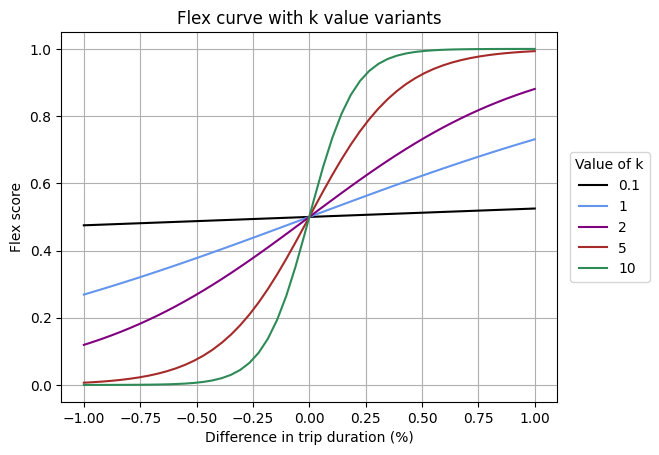

In [387]:
plt.plot(x,y01,label = "0.1", color = "black")
plt.plot(x,y1,label = "1", color = "cornflowerblue")
plt.plot(x,y2,label = "2", color = "purple")
plt.plot(x,y5,label = "5", color = "brown")
plt.plot(x,y10,label = "10", color = "seagreen")
plt.grid()
plt.legend(title = "Value of k", loc = "right", bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Difference in trip duration (%)")
plt.ylabel("Flex score")
plt.title("Flex curve with k value variants")

Text(0.5, 1.0, 'Flex curve (k = 5) with activity utility variants')

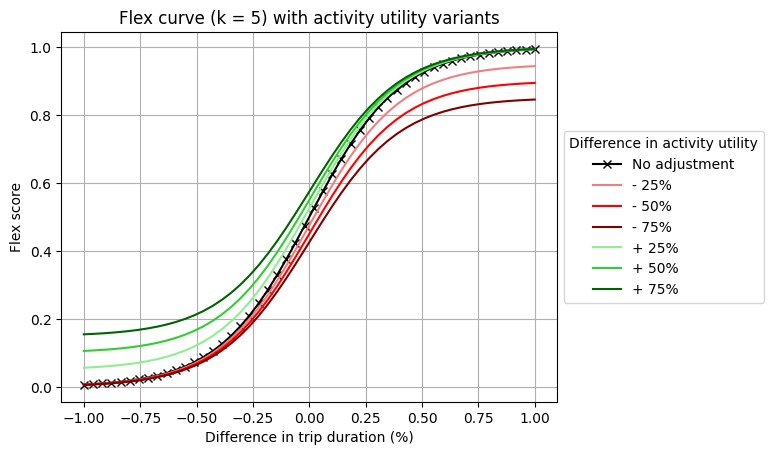

In [389]:
plt.plot(x,y5, 'x-',label = "No adjustment", color = "black")
plt.grid()
plt.plot(x, y5*pos025, label = "- 25%", color = "lightcoral")
plt.plot(x, y5*pos05, label = "- 50%", color = "red")
plt.plot(x, y5*pos075, label = "- 75%", color = "maroon")
plt.plot(x, y5*neg025 - np.tanh(-0.25/5), label = "+ 25%", color = "lightgreen")
plt.plot(x, y5*neg05 - np.tanh(-0.5/5), label = "+ 50%", color = "limegreen")
plt.plot(x, y5*neg075 - np.tanh(-0.75/5), label = "+ 75%", color = "darkgreen")
plt.legend(title = "Difference in activity utility", loc = "right", bbox_to_anchor=(1.43, 0.5))
plt.xlabel("Difference in trip duration (%)")
plt.ylabel("Flex score")
plt.title("Flex curve (k = 5) with activity utility variants")

Could also do a version that isnt mode agnostic, to calculate degree of car dependence?

In [126]:
b

[[444.0], 1958.0]

In [128]:
df["first_trip_durations"][0]

[[444.0], [727.0], [147.0, 473.0, 170.0, 1005.0, 163.0], [635.0], [541.0]]

In [123]:
a[0][0]

'car'

In [ ]:
df.index[df["first_trip_durations"].apply(lambda x: any(v is None for v in x))]

Index([ 217,  307,  393,  601, 1273, 1316, 1396, 1456, 1484, 1529, 1552, 1722,
       1920, 1991, 2013, 2242, 2335, 2850, 2892, 2988, 3388, 3422, 3447, 3548,
       3791, 3837, 4187, 4254, 4297, 4366, 4584, 4647, 5201, 5296, 5434, 5540,
       5882, 5887, 6316, 7236, 7421, 7704, 8181, 8182, 8234, 8259, 8344, 8360,
       9173, 9200, 9418, 9599, 9940],
      dtype='int64')

### Now do the same, but for the longest trip only

### Now try the above but using utility instead of duration

In [13]:
df["selected_legs_indices"] = df["selected plan activity_type_or_mode"].apply(moa.get_trips_indices_only)
df["selected plan leg_durations"] = df.apply(lambda row: moa.get_trips_duration_or_mode(row["legs_indices"], row["selected plan duration"]), axis=1)
df["selected plan leg_modes"] = df.apply(lambda row: moa.get_trips_duration_or_mode(row["legs_indices"], row["selected plan activity_type_or_mode"]), axis=1)

df["unselected1_legs_indices"] = df["unselected plan (1) activity_type_or_mode"].apply(moa.get_trips_indices_only)
df["unselected plan (1) leg_durations"] = df.apply(lambda row: moa.get_trips_duration_or_mode(row["unselected1_legs_indices"], row["unselected plan (1) duration"]), axis=1)
df["unselected plan (1) leg_modes"] = df.apply(lambda row: moa.get_trips_duration_or_mode(row["unselected1_legs_indices"], row["unselected plan (1) activity_type_or_mode"]), axis=1)

df["unselected2_legs_indices"] = df["unselected plan (2) activity_type_or_mode"].apply(moa.get_trips_indices_only)
df["unselected plan (2) leg_durations"] = df.apply(lambda row: moa.get_trips_duration_or_mode(row["unselected2_legs_indices"], row["unselected plan (2) duration"]), axis=1)
df["unselected plan (2) leg_modes"] = df.apply(lambda row: moa.get_trips_duration_or_mode(row["unselected2_legs_indices"], row["unselected plan (2) activity_type_or_mode"]), axis=1)

df["unselected3_legs_indices"] = df["unselected plan (3) activity_type_or_mode"].apply(moa.get_trips_indices_only)
df["unselected plan (3) leg_durations"] = df.apply(lambda row: moa.get_trips_duration_or_mode(row["unselected3_legs_indices"], row["unselected plan (3) duration"]), axis=1)
df["unselected plan (3) leg_modes"] = df.apply(lambda row: moa.get_trips_duration_or_mode(row["unselected3_legs_indices"], row["unselected plan (3) activity_type_or_mode"]), axis=1)

df["unselected4_legs_indices"] = df["unselected plan (4) activity_type_or_mode"].apply(moa.get_trips_indices_only)
df["unselected plan (4) leg_durations"] = df.apply(lambda row: moa.get_trips_duration_or_mode(row["unselected4_legs_indices"], row["unselected plan (4) duration"]), axis=1)
df["unselected plan (4) leg_modes"] = df.apply(lambda row: moa.get_trips_duration_or_mode(row["unselected4_legs_indices"], row["unselected plan (4) activity_type_or_mode"]), axis=1)

In [ ]:
df.head(20)
#DUH TODO: the problem here is i need to group the legs first into trips

NameError: name 'df' is not defined

In [47]:
#check if plans wraparound (just check for selected plan)
df["wraparound"] = df["selected plan activity_type_or_mode"].apply(lambda x: 1 if x[0]==x[-1] else 0)
x = sum(df["wraparound"])/len(df) * 100
print(str(round(x, 2))+" pc of people have a wraparound plan")
# df = df.drop("wraparound", axis=1)

#TODO: should we only keep wraparound plans??

89.16 pc of people have a wraparound plan


In [48]:
#check what time the last activity ends (just check for selected plan). should be less than 32 hours
df["eod_time"] = df["selected plan duration"].apply(lambda x: x[-1])
print(str(max(df["eod_time"]))+" is the latest end of final activity")
print(str(min(df["eod_time"]))+" is the earliest end of final activity")
df = df.drop("eod_time", axis=1)

24:00:00 is the latest end of final activity
24:00:00 is the earliest end of final activity


In [49]:
#check how long the longest leg of a trip is
df["legs_indices"] = df["selected plan activity_type_or_mode"].apply(moa.get_trips_indices_only)
df["activities_indices"] = df["selected plan activity_type_or_mode"].apply(moa.get_activities_indices_only)
df["selected plan leg_durations"] = df.apply(lambda row: moa.get_trips_duration_or_mode(row["legs_indices"], row["selected plan duration"]), axis=1)
df["selected plan activity_durations"] = df.apply(lambda row: moa.get_trips_duration_or_mode(row["activities_indices"], row["selected plan duration"]), axis=1)

print(str(max(df["selected plan leg_durations"]))+" is the longest leg recorded")

['79:21:21'] is the longest leg recorded


Text(0.5, 1.0, 'mean utility per year')

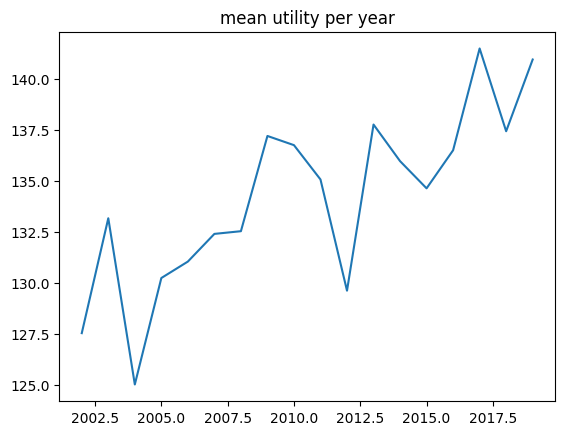

In [50]:
#check how utility changes over time - mean
df2 = df[["surveyyear", "selected plan utility"]]
df2 = df2.groupby('surveyyear', as_index=False).mean()
plt.plot(df2["surveyyear"], df2["selected plan utility"])
plt.title("mean utility per year")

Text(0.5, 1.0, 'median utility per year (including negative)')

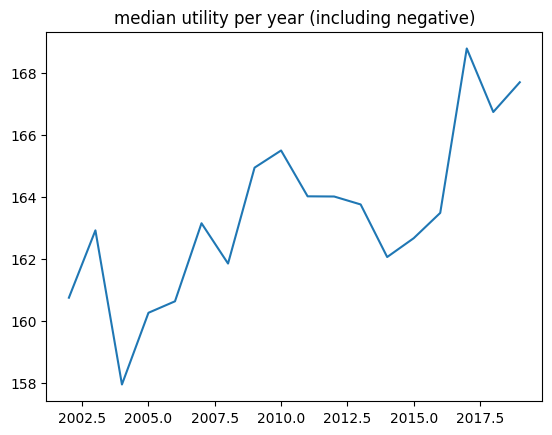

In [51]:
#check how utility changes over time - median
df2 = df[["surveyyear", "selected plan utility"]]
df2 = df2.groupby('surveyyear', as_index=False).median()
plt.plot(df2["surveyyear"], df2["selected plan utility"])
plt.title("median utility per year (including negative)")

## Calculating utility components
(22, 43, 10, 1791)

Get activity start and end times, and highlight any "stuck" agents

In [52]:
# def get_activity_timings(activity_indices, all_durations, all_activities_trips):
#     activity_start_times = []
#     activity_end_times = []
#     all_durations = pd.to_timedelta(all_durations, errors="coerce").total_seconds() 
#     for i in range(len(activity_indices)):
#         schedEndTime = all_durations[activity_indices[i]]
#         if activity_indices[i]==0:
#             startTime = 0
#         else:
#             prevEndTime = all_durations[activity_indices[i-1]]
#             # print("pet: "+str(prevEndTime))
#             x1 = activity_indices[i-1]+1
#             x2 = activity_indices[i]
#             # print(all_durations[x1:x2])
#             # print("x1: "+str(x1))
#             # print("x1: "+str(all_durations[x1]))
#             # print("x2: "+str(x2))
#             # print("x2: "+str(all_durations[x2]))
#             startTime = prevEndTime+sum(all_durations[x1:x2])  
#         if startTime >=  86400: #TODO: try 32 hours instead of 24 hours
#              stuck_index = activity_indices[i] #stuck index if the index of the activity that does not begin
#              break
#         if startTime >= schedEndTime:
#             realEndTime = startTime +1
#         else:
#             realEndTime = schedEndTime
#         stuck_index = activity_indices[-1]+2 #remember that stuck index is related to the total durations index
#         activity_start_times.append(startTime)
#         activity_end_times.append(realEndTime)
#     # print("start: "+str(activity_start_times))
#     # print("end: "+str(activity_end_times))
    
#     # #for i in range(1, len(activity_end_times)):
#     # if activity_end_times[-1] < activity_end_times[-2]:
#     #         activity_end_times[i] += 24*3600  #account for wraparound
#     #         print("adjusted2")
#     # print("end new: "+str(activity_end_times))

#     if (all_activities_trips[0] != all_activities_trips[-1]) & (stuck_index == activity_indices[-1]+2): #only set to midnight for non-stuck agents who don't wrap around
#         activity_end_times[-1] = 24*3600 #set non-wraparound activities to end at midnight

#     activities = moa.get_activities(all_activities_trips, activity_indices, stuck_index)
#     new_activity_start_times, new_activity_end_times = moa.opening_times_adjust(activities, activity_start_times, activity_end_times)
#     count =0
#     if new_activity_start_times != activity_start_times:
#         print(activity_start_times)
#         print(new_activity_start_times)
#         count+=1
#     print(count)
#     return(new_activity_start_times, new_activity_end_times, stuck_index)   

In [53]:
df[["activity_starts", "activity_ends","stuck_index"]] = df.apply(lambda row: moa.get_activity_timings(row["activities_indices"], row["selected plan duration"], row["selected plan activity_type_or_mode"]), axis=1, result_type="expand")

In [54]:
df["calculated_activity_durations"] = df.apply(lambda row: moa.get_activity_durations(row["activity_starts"], row["activity_ends"], row["selected plan activity_type_or_mode"], row["stuck_index"]), axis=1)

In [55]:
# df["selected plan activities"] = df.apply(lambda row: moa.get_activities(row["selected plan activity_type_or_mode"], row["activities_indices"], row["stuck_index"]), axis=1) #this needs to account for stuckness

Now can call activity utility function as normal, BUT ADD IN PENALTY FOR NEGATIVE OVERNIGHT DURATION

In [56]:
df["calculated_activity_u"] =  df.apply(lambda row: moa.calculate_activity_utility(row["selected plan activity_type_or_mode"], row["activities_indices"], row["stuck_index"], row["calculated_activity_durations"]), axis=1)

In [57]:
df.iloc[43]["calculated_activity_u"]

[np.float64(101.77580549217036),
 np.float64(7.7662316982497135),
 np.float64(-78.48781964088938),
 np.float64(111.1696652624436)]

Travel utility

In [58]:
#do the tolls
import xmltodict
import pprint

with open('data/2040_do_minimum_40wfh_rerun_10pc_20250306/output_toll.xml', 'r', encoding='utf-8') as file:
    my_xml = file.read()
output_tolls = xmltodict.parse(my_xml)
tolls = output_tolls["roadpricing"]["links"]["link"]
tolls2  = {item['@id']: item['cost']['@amount'] for item in tolls}

In [59]:
df["calculated_travel_u"] = df.apply(lambda row: moa.calculate_travel_utility(row["selected plan activity_type_or_mode"], row["selected plan duration"], row["selected plan distance_travelled"], row["activities_indices"], row["subpopulation"], row["selected plan routes"], tolls2, row["stuck_index"]), axis=1)

In [60]:
df["calculated_penalty_u"] = df.apply(lambda row: moa.calculate_stuck_penalty(row["selected plan activity_type_or_mode"], row["stuck_index"]), axis=1)

Sum travel, activity, and penalty to get overall score

In [61]:
df["total_travel_u"] = df.apply(lambda row: sum(row["calculated_travel_u"]), axis=1)

In [62]:
df["total_activity_u"] = df.apply(lambda row: sum(row["calculated_activity_u"]), axis=1)

In [63]:
df["calculated_total_u"] = df["total_travel_u"]+df["total_activity_u"]+df["calculated_penalty_u"]

(array([1.000e+00, 2.000e+00, 4.000e+00, 1.900e+01, 5.600e+01, 2.210e+02,
        5.190e+02, 2.401e+03, 7.123e+03, 8.079e+03]),
 array([-700.80839253, -603.84846344, -506.88853435, -409.92860527,
        -312.96867618, -216.0087471 , -119.04881801,  -22.08888893,
          74.87104016,  171.83096924,  268.79089833]),
 <BarContainer object of 10 artists>)

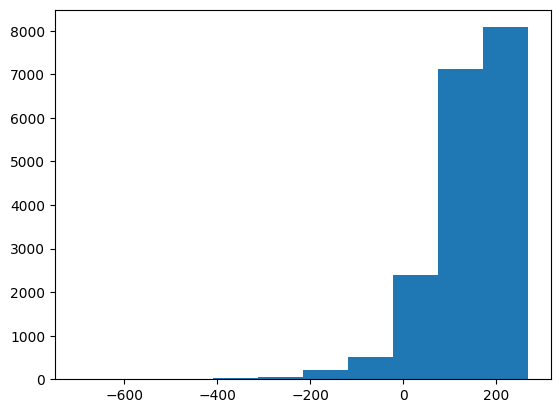

In [64]:
plt.hist(df["calculated_total_u"])

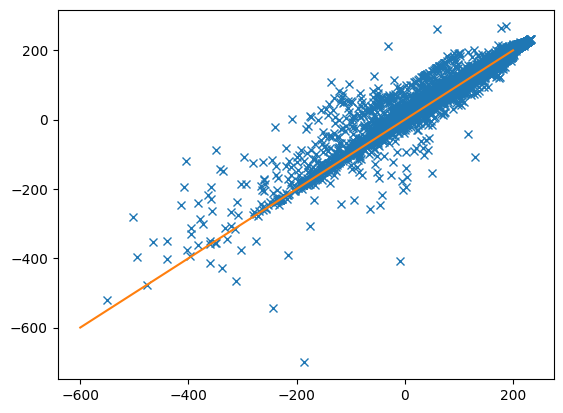

In [71]:
plt.plot(df["selected plan utility"], df["calculated_total_u"], "x")
x = [-600,-200,0,200]
y1 = [i*1.1 for i in x ]
y2 = [i*0.9 for i in x ]
y3 = [i+85 for i in x ]
plt.plot(x, x)
# plt.plot(x, y1)
# plt.plot(x, y2)
# plt.plot(x, y3)
# plt.ylim(-1000,300)

In [30]:
# plt.hist(df["diff"], bins=500)
# plt.xlim(-50,50)

TODO:
1. do the negative duration of first activity correction

In [68]:
df["diff"] = df["selected plan utility"] - df["calculated_total_u"]

In [39]:
df["diff_pc"] = ((df["selected plan utility"] - df["calculated_total_u"])*100) / df["selected plan utility"]

(array([2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 6.000e+00, 3.000e+00, 3.000e+00, 4.000e+00,
        7.000e+00, 1.000e+00, 3.000e+00, 6.000e+00, 1.000e+01, 4.300e+01,
        1.100e+01, 3.000e+01, 2.900e+01, 6.700e+01, 1.120e+02, 4.260e+02,
        7.822e+03, 3.340e+02, 1.560e+02, 2.700e+01, 7.000e+00, 5.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-299.93101675, -287.85644099, -275.78186522, -263.70728946,
        -251.6327137 , -239.55813794, -227.48356217, -215.40898641,
        -203.33441065, -191.25983489, -179.18525912, -167.11068336,
        -155.0361076 , -142.96153184, -130.88695607, -118.81238031,
        -106.73780455,  -94.66322879,  -82.58865303,  -70.51407726,
         -58.4395015 ,  -46.36492574

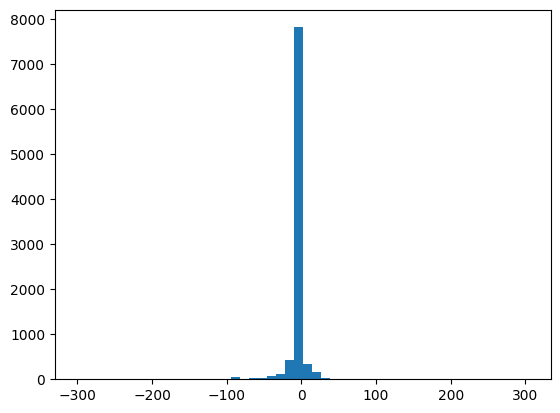

In [43]:
plt.hist(df["diff"], bins=50)
# plt.xlim(-100,100)
# plt.ylim(0,50000)

In [36]:
len(df[df["diff_pc"]<100])

8986

In [70]:
diffs = list(df["diff"])
calcutils = list(df["calculated_total_u"])
for i in range(len(diffs)):
    if abs(diffs[i]>80) :
    # if calcutils[i] < -600:
        print("i: "+str(i))
        print("id: "+str(df.iloc[i]["id"]))
        print(df.iloc[i]["subpopulation"])

i: 558
id: 391166
medium
i: 695
id: 89418
ev_low
i: 910
id: 22278
ev_low
i: 1188
id: 99507
ev_medium
i: 1874
id: 36580
low
i: 2623
id: 109228
ev_low
i: 3092
id: 52468
medium
i: 3561
id: 100277
ev_medium
i: 3631
id: 373381
ev_low
i: 7401
id: 16202
medium
i: 7848
id: 309956
high
i: 7928
id: 272084
ev_low
i: 7933
id: 176183
low
i: 10202
id: 53292
high
i: 10234
id: 388768
high
i: 10457
id: 262672
low
i: 11143
id: 312107
low
i: 11585
id: 179422
ev_medium
i: 11623
id: 24405
low
i: 11928
id: 19590
ev_low
i: 13113
id: 97086
ev_medium
i: 13266
id: 53382
high
i: 14516
id: 156315
ev_high
i: 14888
id: 206879
ev_low
i: 15130
id: 77189
low
i: 15435
id: 178520
ev_low
i: 15651
id: 362519
ev_high
i: 15920
id: 419320
ev_high
i: 15958
id: 163346
ev_medium
i: 16424
id: 186160
medium
i: 16901
id: 118863
medium
i: 17536
id: 370807
low
i: 17806
id: 329204
low
i: 18075
id: 138775
low


In [62]:
df.iloc[1937]["calculated_activity_durations"]

[np.float64(47778.0), np.float64(31800.0)]

In [56]:
moa.assign_tolls(tolls2, df.iloc[1937]["selected plan routes"][0], "car")

50.0

In [73]:
utes = list(df["calculated_total_u"])
for i in range(len(utes)):
    if utes[i]<-400:
        print("i: "+str(i))
        print("id: "+str(df.iloc[i]["id"]))

i: 705
id: 56917
i: 1217
id: 50187


In [91]:
df.iloc[4021]["activity_ends"]

[np.float64(46987.0), np.float64(61446.0), np.float64(88707.0)]

In [66]:
moa.assign_tolls(tolls2, df.iloc[4021]["selected plan routes"][0], "car")

0.0

In [68]:
a, b, c, = moa.get_activity_timings(df.iloc[4021]["activities_indices"], df.iloc[4021]["selected plan duration"], df.iloc[4021]["selected plan activity_type_or_mode"])

In [70]:
moa.get_activity_durations(a, b, df.iloc[4021]["selected plan activity_type_or_mode"], c)

[np.float64(73935.0), np.float64(1.0)]

In [ ]:
#TODO: what's gone wrong here is the start time of the last activity - it is not lining up
# so every time they miss an activity, such that it lasts only 1 second, the next activity's start time isn't updating properly
#TODO: negative overnight time
#TODO: opening and closing times
#TODO: experienced versus planned plans are sometimes v different uhoh
#TODO: test if stuck is for 24h or 32h

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 7.000e+00, 8.000e+00,
        9.000e+00, 1.783e+03, 3.200e+01, 7.000e+00]),
 array([-699.8651915 , -603.70022832, -507.53526513, -411.37030195,
        -315.20533877, -219.04037559, -122.8754124 ,  -26.71044922,
          69.45451396,  165.61947714,  261.78444033]),
 <BarContainer object of 10 artists>)

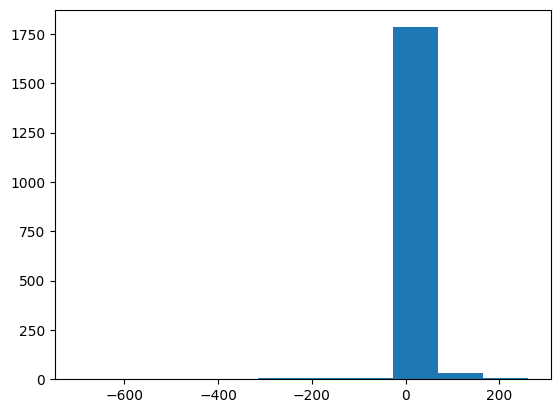

In [39]:
df["diff"]=df["calculated_total_u"]-df["selected plan utility"]
plt.hist(df["diff"])

In [40]:
us = (list(df["diff"]))

In [41]:
n = 0
for i in range(len(us)):
    if  abs(us[i]) > 2:
        print(i)
        n+=1

0
3
6
7
10
13
14
16
18
19
20
21
25
26
30
33
37
38
39
43
44
46
47
49
51
52
53
55
58
59
60
62
65
67
69
71
74
83
84
90
94
95
96
98
99
100
105
107
108
109
110
112
115
117
118
121
123
128
129
130
131
136
137
138
139
140
142
143
144
147
148
149
150
153
157
160
165
167
171
172
175
176
179
180
186
187
189
190
194
195
197
200
201
203
205
211
214
219
223
227
228
230
233
239
242
243
244
245
248
249
253
255
256
258
259
261
265
266
268
272
273
274
279
280
291
295
296
297
301
305
306
314
316
317
319
320
321
322
323
326
327
328
330
338
339
340
341
343
345
346
347
348
349
350
352
353
354
356
359
361
363
365
366
367
372
376
377
379
380
382
383
384
386
387
391
395
396
397
403
405
408
410
412
413
414
417
418
419
420
421
423
424
433
435
436
437
442
443
444
446
447
449
451
453
459
466
471
475
477
478
482
483
484
486
488
492
496
498
499
504
508
510
512
513
527
528
529
530
531
537
541
546
547
554
557
566
567
568
572
573
577
580
584
585
590
591
595
597
605
607
608
618
620
623
627
628
629
631
632
634
636
637
6

In [37]:
non_wraps = df[df["wraparound"]==0]
len(non_wraps)

48776

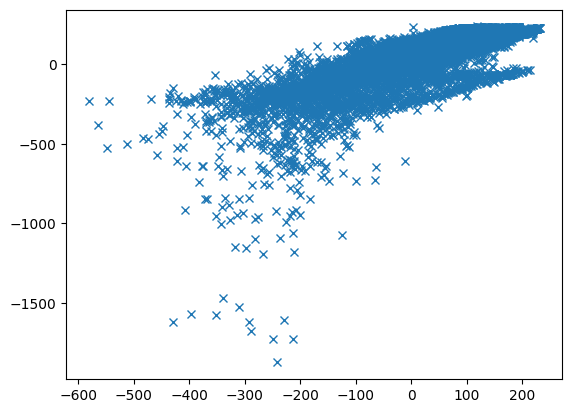

In [38]:
plt.plot(non_wraps["selected plan utility"], non_wraps["calculated_total_u"], "x")

In [62]:
nwn = 0
for i in range(len(non_wraps)):
    if non_wraps.iloc[i]["calculated_total_u"]<0 and non_wraps.iloc[i]["selected plan utility"]>0:
    #if abs(non_wraps.iloc[i]["diff"]/non_wraps.iloc[i]["selected plan utility"])>10: #how many are more than 1% out
        print(non_wraps.iloc[i]["id"])
        print("i is: "+str(i))
        nwn+=1
print("n is "+str(nwn))

22502
i is: 50
280919
i is: 52
193420
i is: 76
348691
i is: 102
n is 4


In [39]:
onesec_activities = df[df['calculated_activity_durations'].apply(lambda x: 1 in x)]
len(onesec_activities)

59775

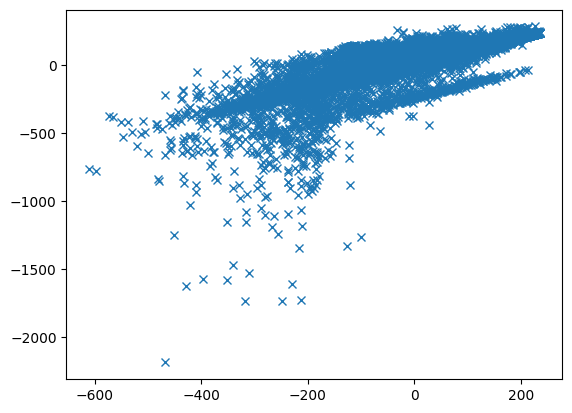

In [40]:
plt.plot(onesec_activities["selected plan utility"], onesec_activities["calculated_total_u"], "x")

In [41]:
from datetime import datetime, timedelta
def crosses_midnight(times):
    """Return True if (last time - 24h) > first time (wraps to next day)."""
    if not times or len(times) < 2:
        return False

    def parse_time(t):
        # Split safely and normalize weird hours like 24–37
        try:
            h, m, s = map(int, t.split(':'))
        except Exception:
            return None

        base = datetime(2000, 1, 1)
        if h >= 24:  # wrap to next day if needed
            base += timedelta(days=h // 24)
            h = h % 24

        try:
            return base.replace(hour=h, minute=m, second=s)
        except ValueError:
            return None

    first = parse_time(times[0])
    last = parse_time(times[-1])
    if not first or not last:
        return False

    last_minus_24 = last - timedelta(hours=24)
    return last_minus_24 > first

# Apply the condition
endafterstart = df[df['selected plan duration'].apply(crosses_midnight)]
len(endafterstart)

330

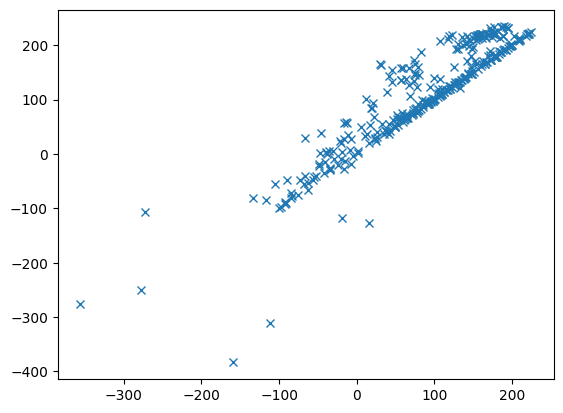

In [42]:
plt.plot(endafterstart["selected plan utility"], endafterstart["calculated_total_u"], "x")

### Fix at least the well-behaved agents

In [43]:
used_idx = pd.concat([endafterstart, onesec_activities, non_wraps]).index.unique()
wellbehaved = df.loc[~df.index.isin(used_idx)]
len(wellbehaved)

345495

In [44]:
len(df[df["diff"]<0.2])/len(df)

KeyError: 'diff'

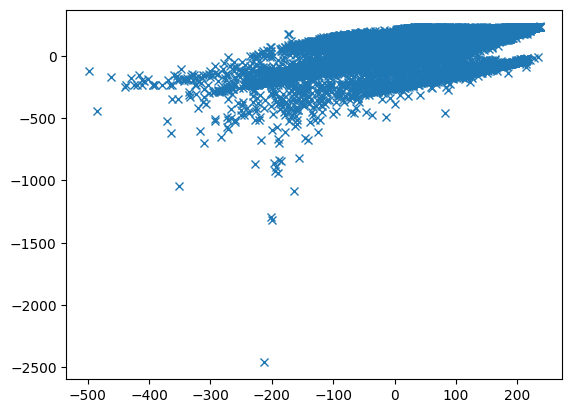

In [45]:
plt.plot(wellbehaved["selected plan utility"], wellbehaved["calculated_total_u"], "x")

(array([1., 0., 0., ..., 0., 0., 1.], shape=(1420,)),
 array([-261.78444033, -261.42297623, -261.06151213, ...,  250.77165123,
         251.13311533,  251.49457943], shape=(1421,)),
 <BarContainer object of 1420 artists>)

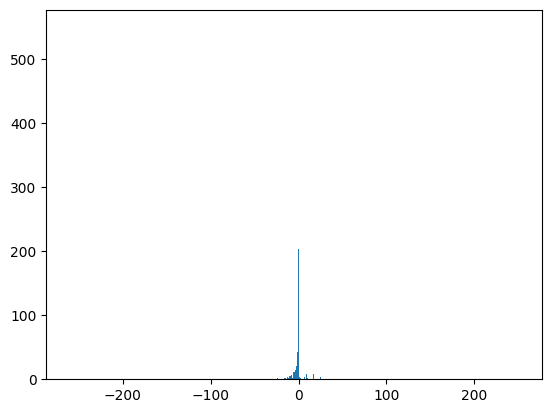

In [70]:
plt.hist(wellbehaved["diff"], bins=len(wellbehaved))

In [415]:
n = 0
for i in range(len(wellbehaved)):
    if abs(wellbehaved.iloc[i]["diff"]/wellbehaved.iloc[i]["selected plan utility"])>0.1: #how many are more than 1% out
        print(wellbehaved.iloc[i]["id"])
        print("i is: "+str(i))
        n+=1
print("n is "+str(n))

57310
i is: 8
53609
i is: 15
327929
i is: 16
445977
i is: 39
84809
i is: 40
295934
i is: 49
247242
i is: 65
421854
i is: 70
164620
i is: 72
27125
i is: 88
69435
i is: 103
385091
i is: 106
51544
i is: 143
387661
i is: 146
247693
i is: 150
110493
i is: 154
102355
i is: 165
295900
i is: 190
248387
i is: 206
398415
i is: 213
410770
i is: 241
414819
i is: 244
142683
i is: 259
95863
i is: 264
409628
i is: 274
76860
i is: 278
436396
i is: 284
334663
i is: 288
297416
i is: 290
190849
i is: 300
368817
i is: 317
288930
i is: 319
342180
i is: 322
245523
i is: 323
161682
i is: 344
3040
i is: 367
215882
i is: 372
49866
i is: 373
444707
i is: 383
324654
i is: 388
192873
i is: 392
76042
i is: 395
113632
i is: 428
24545
i is: 437
255134
i is: 444
194442
i is: 448
137558
i is: 449
441812
i is: 487
310647
i is: 492
181241
i is: 495
296984
i is: 502
209273
i is: 506
218880
i is: 512
275899
i is: 534
310040
i is: 537
295057
i is: 549
423462
i is: 557
188894
i is: 561
128244
i is: 577
62535
i is: 627
26546

In [345]:
wellbehaved.iloc[8]["calculated_travel_utility"]

[np.float64(-9.936993755821096),
 np.float64(-8.812698636932037),
 np.float64(-14.370239925848187),
 np.float64(-13.82632849124332)]

In [346]:
wellbehaved.iloc[8]["activity_durations"]

[np.int32(56453), np.int32(26432), np.int32(1073), np.int32(788)]

In [318]:
wellbehaved.iloc[8]["id"]

np.int64(57310)

## Whole plan modal flexibility

This requires the function to choose only the longest leg per trip and use that as a proxy for simplicity. Then compare the plan's set of main modes across plans and compare this to utility change across plans. Completed in old code setup. Skipped for now here. 

## Trip-based modal flexibility

Here we can unpick the utility function and compare utility for a person for a given trip. We can look at either a given trip number (e.g., first trip of the day), the longest (distance) trip, a given trip purpose (e.g., travel to work), or get a composite across the whole day (complex!!). We can also look at just the longest leg of the trip for simplicity or look at the total set of legs together. To do this well, we need to understand the config files properly though - **AGH**.

### First trip of the day, combining all legs

1. Separate out the trips and choose the first (for each plan)
2. Find the change in mode by comparing the whole combination of modes -> check, this might be problematic and we may need to revert to looking at main mode (by distance) for this step
3. Calculate the utility lost for each leg and sum to find utility of trip. For each plan
4. Find the change in utility across plans
5. Find the flexibility by comparing change in mode to change in plans